In [13]:
#Auto reloading 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#Importing scripts:
import cbgt as cbgt
#import pdb
import pipeline_creation as pl_creat
import plotting_functions as plt_func
import plotting_helper_functions as plt_help

data_dir = "./Data/"
figure_dir = "./Figures/"

In [17]:
experimentchoice = 'plastic'

pl_creat.choose_pipeline(experimentchoice)

pl = pl_creat.create_main_pipeline(runloop=True)

In [18]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'experimentchoice': experimentchoice,
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    #'dpmns' : pd.DataFrame([0.05], columns=['dpmn_wmax']),
    #'d1' : None, #D1-MSNs population related parameters (init_params.py)
    'd1': pd.DataFrame([[39.5,0.055]], columns=['dpmn_alphaw','dpmn_wmax']),
    'd2': pd.DataFrame([[-38.2,0.035]], columns=['dpmn_alphaw','dpmn_wmax']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' :pd.DataFrame([['LIP', 'FSI', 'AMPA', 'all', 1, 0.43]], columns=['src', 'dest', 'receptor', 'type', 'con', 'eff']),    #None, #connectivity parameters (popconstruct.py)
    'Q_support_params': pd.DataFrame([[85,0.6]],columns=['dpmn_CPP_scale','q_alpha']), #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 1.0, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.01, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 1.0, # 3 instead? how much stimulus the LIP gets at maximum
    'opt_signal_present':False,
    'opt_signal_probability':1.0, # probability of trials that will get the stop signal / list of trial numbers
    'opt_signal_amplitude':0.2, # ampitude of the stop signal over base line
    'opt_signal_onset':0., # in ms
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["D1STR"],
    'sustainedfraction':0.85
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
}
results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)

RayTaskError: [36mray::worker()[39m (pid=2419297, ip=172.26.98.27)
  At least one of the input arguments for this task could not be computed:
ray.exceptions.RaySystemError: System error: Can't get attribute 'codeblock_experimentchoice' on <module 'pipeline_creation' from '/home/jyotika/Work/cbgt_plasticity_DDM/churchland_code/pipeline_creation.py'>
traceback: Traceback (most recent call last):
  File "/home/jyotika/Utils/envs/cbgt_env3.8/lib/python3.8/site-packages/ray/serialization.py", line 281, in deserialize_objects
    obj = self._deserialize_object(data, metadata, object_ref)
  File "/home/jyotika/Utils/envs/cbgt_env3.8/lib/python3.8/site-packages/ray/serialization.py", line 194, in _deserialize_object
    return self._deserialize_msgpack_data(data, metadata_fields)
  File "/home/jyotika/Utils/envs/cbgt_env3.8/lib/python3.8/site-packages/ray/serialization.py", line 172, in _deserialize_msgpack_data
    python_objects = self._deserialize_pickle5_data(pickle5_data)
  File "/home/jyotika/Utils/envs/cbgt_env3.8/lib/python3.8/site-packages/ray/serialization.py", line 162, in _deserialize_pickle5_data
    obj = pickle.loads(in_band)
AttributeError: Can't get attribute 'codeblock_experimentchoice' on <module 'pipeline_creation' from '/home/jyotika/Work/cbgt_plasticity_DDM/churchland_code/pipeline_creation.py'>

(worker pid=2419297) 2023-02-20 16:04:49,051	ERROR serialization.py:283 -- Can't get attribute 'codeblock_experimentchoice' on <module 'pipeline_creation' from '/home/jyotika/Work/cbgt_plasticity_DDM/churchland_code/pipeline_creation.py'>
(worker pid=2419297) Traceback (most recent call last):
(worker pid=2419297)   File "/home/jyotika/Utils/envs/cbgt_env3.8/lib/python3.8/site-packages/ray/serialization.py", line 281, in deserialize_objects
(worker pid=2419297)     obj = self._deserialize_object(data, metadata, object_ref)
(worker pid=2419297)   File "/home/jyotika/Utils/envs/cbgt_env3.8/lib/python3.8/site-packages/ray/serialization.py", line 194, in _deserialize_object
(worker pid=2419297)     return self._deserialize_msgpack_data(data, metadata_fields)
(worker pid=2419297)   File "/home/jyotika/Utils/envs/cbgt_env3.8/lib/python3.8/site-packages/ray/serialization.py", line 172, in _deserialize_msgpack_data
(worker pid=2419297)     python_objects = self._deserialize_pickle5_data(pickle

2023-02-20 16:11:29,398	ERROR worker.py:478 -- print_logs: Connection closed by server.
2023-02-20 16:11:29,402	ERROR worker.py:1247 -- listen_error_messages_raylet: Connection closed by server.
2023-02-20 16:11:29,403	ERROR import_thread.py:89 -- ImportThread: Connection closed by server.


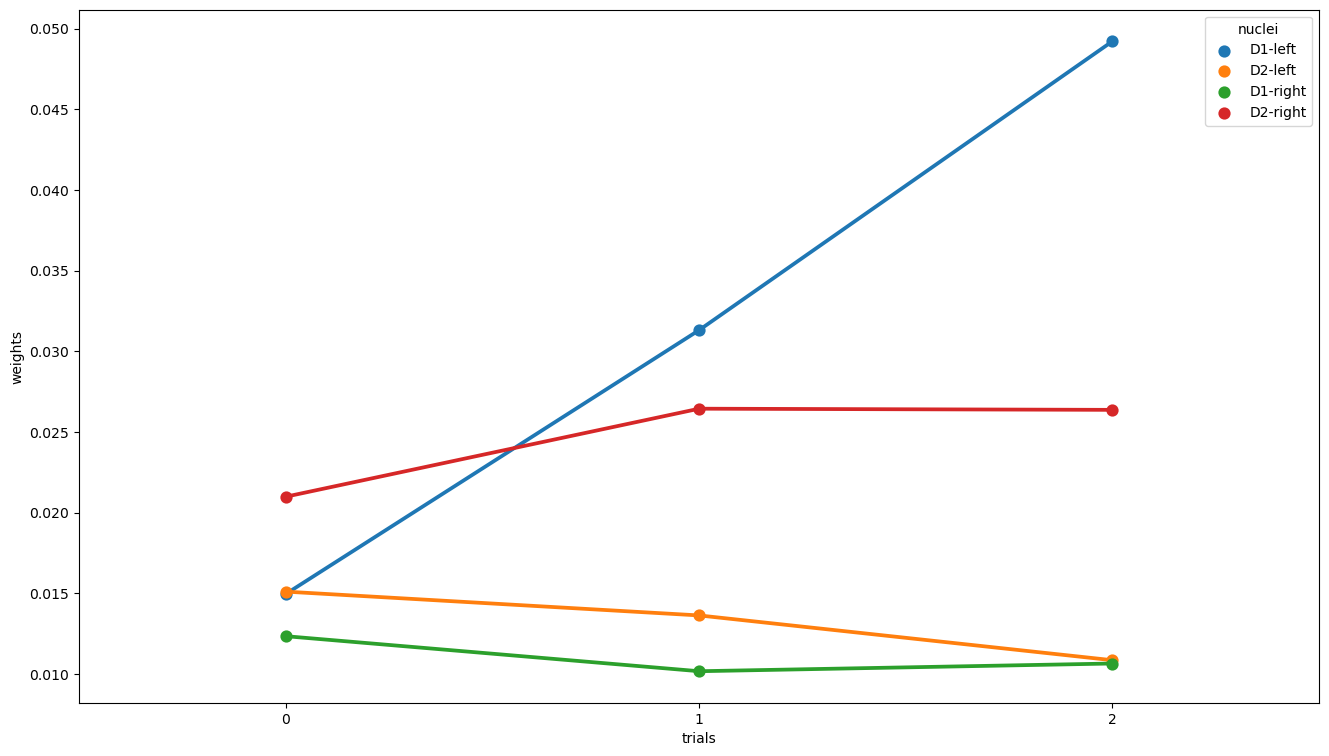

In [18]:
import seaborn as sns
for i in np.arange(len(results)):
    weights = np.array(results[i]['agent'].hist_w)
    weights[0]
    np.shape(weights)
    reshaped_wts = weights.reshape(len(weights),4)
    nuc_list = ['D1-left','D2-left','D1-right','D2-right' ]
    ind_list = [(0,0),(0,1),(1,0),(1,1)]
    weights_df = pd.DataFrame(columns=["weights","trials","nuclei"])

    for j in np.arange(4):
        temp = pd.DataFrame()
        temp["weights"] = [ np.mean(reshaped_wts[:,j][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
        #temp["weights"] = [ weights[:,ind_list[j][0],ind_list[j][1],:,:][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
        temp["trials"] = np.arange(0,len(datatables[0])-1)
        temp["nuclei"] = nuc_list[j]
        weights_df = weights_df.append(temp)
    
    #weights_df.to_csv(data_dir+"Weights_"+str(seed)+".csv")
    fig,ax = plt.subplots(1,1,figsize=(16,9))
    sns.pointplot(x="trials",y="weights",hue="nuclei",data=weights_df,ax=ax)
    plt.show()
    #fig.savefig(figure_dir+"Weights_"+str(seed)+"_"+str(i)+".png")    

In [5]:
experimentchoice = 'stopsignal'

pl_creat.choose_pipeline(experimentchoice)

pl = pl_creat.create_main_pipeline(runloop=True)

In [6]:
environment = {
    'experimentchoice': experimentchoice,
    
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 2, #number of trials (generateepochs.py)
    'volatility': 1, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.85, # 3 instead? how much stimulus the LIP gets at maximum
    'sustainedfraction': 0.75,
    
    #STN
    'stop_signal_present': False,
    'stop_signal_probability': 1.0, #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': 0.85, # amplitude of the stop signal over base line
    'stop_signal_onset': 40., #in ms #antes 200
    'stop_signal_duration' : 130., 
    'stop_signal_channel': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
    #D2STR
    'stop_signal_present_2': False,
    'stop_signal_probability_2': 1.0, #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude_2': 1, # amplitude of the stop signal over base line
    'stop_signal_onset_2': 40., #in ms #antes 200
    'stop_signal_duration_2' : 90.,
    'stop_signal_channel_2': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
    'decision_channel' : 'all', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
} 

results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)

(worker pid=37760) reward_values [1.17640523 1.04001572]
(worker pid=37760) cp_idx [0 1 1]
(worker pid=37760) cp_idx [0 1 1]
(worker pid=37760) <class 'float'>
(worker pid=37760) [0 1]
(worker pid=37760) <class 'float'>
(worker pid=37760) [0 1]
(worker pid=37760) q_support None
(worker pid=37760) 0    15.0`
(worker pid=37760) Name: dpmn_CPP_scale, dtype: object
(worker pid=37760) 2 4 0.161666`
(worker pid=37760) 2 6 0.32333`
(worker pid=37760) 3 5 0.161666`
(worker pid=37760) 3 7 0.32333`
(worker pid=37760) 12 8 1.0`
(worker pid=37760) 12 10 1.0`
(worker pid=37760) 12 12 0.13`
(worker pid=37760) 12 14 1.0`
(worker pid=37760) 12 16 1.0`
(worker pid=37760) 12 17 0.0725`
(worker pid=37760) 13 9 1.0`
(worker pid=37760) 13 11 1.0`
(worker pid=37760) 13 13 0.13`
(worker pid=37760) 13 15 1.0`
(worker pid=37760) 13 16 1.0`
(worker pid=37760) 13 17 0.0725`
(worker pid=37760) 14 8 1.0`
(worker pid=37760) 14 10 1.0`
(worker pid=37760) 14 16 0.8334`
(worker pid=37760) 15 9 1.0`
(worker pid=37760) 

In [7]:
datatables = cbgt.collateVariable(results,'datatables')

In [8]:
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,right,0,249,249,550,550,left,0.0
1,left,1151,1350,199,500,1651,left,1.0
2,left,2252,2380,128,429,2681,left,1.0
3,right,3282,3463,181,482,3764,right,1.0


In [9]:
results[0]['popspecific']

KeyError: 0

In [ ]:
popfreqs = cbgt.collateVariable(results,'popfreqs')
results[0]['popfreqs']


In [10]:
plt_help.rename_columns(results[0])
results[0]['popfreqs']

KeyError: 0

In [12]:
sorted(list(results[0].keys()))

['AMPA_con',
 'AMPA_eff',
 'GABA_con',
 'GABA_eff',
 'NMDA_con',
 'NMDA_eff',
 'Q_df',
 'Q_support_params',
 'actionchannels',
 'agent',
 'base',
 'basestim',
 'block',
 'celldefaults',
 'channels',
 'chosen_action',
 'conflict',
 'connectivity_AMPA',
 'connectivity_GABA',
 'connectivity_NMDA',
 'cp_idx',
 'cp_indicator',
 'd1',
 'd1defaults',
 'd2',
 'd2defaults',
 'datatables',
 'decision_channel',
 'dpmndefaults',
 'dpmns',
 'experimentchoice',
 'maxstim',
 'meaneff_AMPA',
 'meaneff_GABA',
 'meaneff_NMDA',
 'n_trials',
 'newpathways',
 'noisy_pattern',
 'params',
 'pathways',
 'plastic_AMPA',
 'plastic_GABA',
 'plastic_NMDA',
 'popdata',
 'popfreqs',
 'pops',
 'popspecific',
 'receps',
 'receptordefaults',
 'reward_mu',
 'reward_std',
 'reward_val',
 'stop_amplitude_df',
 'stop_amplitude_df_2',
 'stop_channels_df',
 'stop_channels_df_2',
 'stop_df',
 'stop_df_2',
 'stop_duration_df',
 'stop_duration_df_2',
 'stop_onset_df',
 'stop_onset_df_2',
 'stop_signal_amplitude',
 'stop_signal

In [13]:
results[0]['popdata']

,name,action,N,C,Taum,RestPot,ResetPot,Threshold,RestPot_ca,Alpha_ca,...,dpmn_XPRE,dpmn_XPOST,dpmn_type,dpmn_alphaw,dpmn_wmax,dpmn_a,dpmn_b,dpmn_c,column,newname
0,GPi`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,0,GPi_left`
1,GPi`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,1,GPi_right`
2,STNE`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,2,STNE_left`
3,STNE`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,3,STNE_right`
4,GPeP`,left`,500`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,4,GPeP_left`
5,GPeP`,right`,500`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,5,GPeP_right`
6,GPeA`,left`,250`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,6,GPeA_left`
7,GPeA`,right`,250`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,7,GPeA_right`
8,D1STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,1`,34.83333333333333`,0.06`,1.0`,0.1`,0.05`,8,D1STR_left`
9,D1STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,1`,34.83333333333333`,0.06`,1.0`,0.1`,0.05`,9,D1STR_right`
